# Quantized FACILE Training with Brevitas
This notebook walks through the steps to train and and validate the Pytorch Brevitas reconstruction of the HCAL Facile model

Initial Pytorch conversion by Vladimir Oveckhin
Pytorch to Brevitas conversion by Matthew Trahms

In [1]:
#install pandas (missing in FINN env)
!pip install --user pandas

     |################################| 9.5MB 4.8MB/s eta 0:00:01


In [1]:
#import the necessary classes and functions
from train import train
from metrics import Metrics
from quant_model import QuantNet
from quant_modelV2 import QuantNet_opt
from quantmodelV2_with_proc import QuantNet_opt_proc

In [2]:
models_folder = 'quant_models'

X_train shape: (229538, 14)
X_val shape: (12752, 14)
X_test shape: (12752, 14)
Y_train shape: (229538, 1)
Y_val shape: (12752, 1)
Y_test shape: (12752, 1)
Using saved split data
Number of batches per epoch: 460
# of Model parameters: 982.0
# of features: 14


Epoch 1
Ave Train Loss: 5.149811158137119e-06
Ave Val Loss: 7.572406886740484e-05
Min Ave Val Loss: 7.572406886740484e-05
Saved model


Epoch 2
Ave Train Loss: 1.0325160771290944e-06
Ave Val Loss: 4.471099814437034e-05
Min Ave Val Loss: 4.471099814437034e-05
Saved model


Epoch 3
Ave Train Loss: 8.229970538615577e-07
Ave Val Loss: 3.3935408398050756e-05
Min Ave Val Loss: 3.3935408398050756e-05
Saved model


Epoch 4
Ave Train Loss: 7.240341663774521e-07
Ave Val Loss: 3.127636239422293e-05
Min Ave Val Loss: 3.127636239422293e-05
Saved model


Epoch 5
Ave Train Loss: 6.841672092832632e-07
Ave Val Loss: 3.490393138481378e-05
Min Ave Val Loss: 3.127636239422293e-05


Epoch 6
Ave Train Loss: 6.740372498933701e-07
Ave Val Loss: 3.2889020

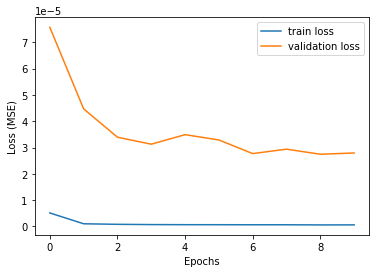

In [3]:
#train (mimicing structure in train.py)
metrics = Metrics()
model = None
try:
    model = train(QuantNet_opt, metrics=metrics, models_folder_path=models_folder, quantized=True)
except KeyboardInterrupt:
    print("Interrupted")
finally:
    metrics.plot_losses()

In [ ]:
#export to onnx finn format
from brevitas.onnx import export_finn_onnx
input_shape = [1,14]
#copy = QuantNet_opt(14)
#copy.load_state_dict(model.state_dict())
export_finn_onnx(model, input_shape, models_folder + "/facileV3_4b_1.onnx")

In [5]:
print(model)

QuantNet_opt(
  (bn0): BatchNorm1d(14, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (qinp): QuantIdentity(
    (input_quant): IdentityQuantProxyFromInjector(
      (_zero_hw_sentinel): StatelessBuffer()
    )
    (act_quant): ActQuantProxyFromInjector(
      (_zero_hw_sentinel): StatelessBuffer()
      (fused_activation_quant_proxy): FusedActivationQuantProxy(
        (activation_impl): Identity()
        (tensor_quant): RescalingIntQuant(
          (int_quant): IntQuant(
            (float_to_int_impl): RoundSte()
            (tensor_clamp_impl): TensorClamp()
            (delay_wrapper): DelayWrapper(
              (delay_impl): _NoDelay()
            )
          )
          (scaling_impl): ParameterFromRuntimeStatsScaling(
            (stats_input_view_shape_impl): OverTensorView()
            (stats): _Stats(
              (stats_impl): AbsPercentile()
            )
            (restrict_clamp_scaling): _RestrictClampValue(
              (restrict_value_impl): 